In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')
%config linlineBackend.figure_format = 'retina'

In [2]:
def coin_data(btc, xrp, eth, ltc, xem, lsk):
    # データ読み込み
    btc = btc.iloc[:, 3:4]
    xrp = xrp.iloc[:, 3:4]
    eth = eth.iloc[:, 3:4]
    ltc = ltc.iloc[:, 3:4]
    xem = xem.iloc[:, 3:4]
    lsk = lsk.iloc[:, 3:4]
    
    coin = btc.copy()
    coin['BTC'] = btc['Close']
    coin['XRP'] = xrp['Close']
    coin['ETH'] = eth['Close']
    coin['LTC'] = ltc['Close']
    coin['XEM'] = xem['Close']
    coin['LSK'] = lsk['Close']
    coin = coin.drop(['Close'], axis=1)
    
    coin_row = len(coin)
    sta = 1
    coin['count'] = 0
    for i in range(coin_row):
        coin['count'][i] = sta
        sta += 1
    
    
    # モデルの作成
    X = coin.iloc[:-3, :]
    y = coin.iloc[1:-2, 1:2]

    import xgboost as xgb
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split

    model = xgb.XGBRFRegressor()
    train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
    model_cv = GridSearchCV(model, {'max_depth': [2,4,6,8,10,12], 'n_estimators': [50,100,200,300,400,500]}, verbose=1)
    model_cv.fit(train_x, train_y)

    model = xgb.XGBRegressor(**model_cv.best_params_)
    model.fit(train_x, train_y)
    
    
    # 検証結果
    pred = model.predict(coin)
    pre_list = coin.iloc[:, 1:2]
    
    # 小数点3桁表示に変える
    pre_3r = []
    for i in range(len(pred)):
        pre_3r.append(round(pred[i], 3))
    pre_list['NextDay'] = pre_3r
    pre_list
    pre_list = round(pre_list, 3)
    
    pre_list['prediction'] = ''
    pre_list['truth'] = ''

    # up-down検証
    for i in range(coin_row):
        if i < coin_row - 1:
            if pre_list['NextDay'][i] > pre_list['XRP'][i]:
                if pre_list['XRP'][i] < pre_list['XRP'][i + 1]:
                    a = 'up'
                else:
                    a = 'down'
                b = 'up'
            elif pre_list['NextDay'][i] < pre_list['XRP'][i]:
                if pre_list['XRP'][i] > pre_list['XRP'][i + 1]:
                    a = 'down'
                else:
                    a = 'up'
                b = 'down'
            pre_list['prediction'][i] = b
            pre_list['truth'][i] = a
        else:
            if pre_list['NextDay'][i] > pre_list['XRP'][i]:
                b = 'up'
            elif pre_list['NextDay'][i] < pre_list['XRP'][i]:
                b = 'down'
            pre_list['prediction'][i] = b
    
    day10 = pre_list.iloc[-30:, :]
    Accuracy_rate = len(day10[day10['prediction'] == day10['truth']]) / (len(day10) - 1)
    Accuracy_rate = Accuracy_rate * 100
    
    return pre_list, Accuracy_rate, coin, X, y

In [3]:
ys = 2017
ms = 1
ds = 1

In [4]:
import warnings
warnings.filterwarnings('ignore')
pre_list, Accuracy_rate, coin, X, y = coin_data(web.get_data_yahoo('BTC-jpy', start=datetime.datetime(ys,ms,ds)),
                                          web.get_data_yahoo('XRP-jpy', start=datetime.datetime(ys,ms,ds)),
                                          web.get_data_yahoo('ETH-jpy', start=datetime.datetime(ys,ms,ds)),
                                          web.get_data_yahoo('LTC-jpy', start=datetime.datetime(ys,ms,ds)),
                                          web.get_data_yahoo('XEM-jpy', start=datetime.datetime(ys,ms,ds)),
                                          web.get_data_yahoo('LSK-jpy', start=datetime.datetime(ys,ms,ds)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:47] WARN

[20:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:51] WARNI

[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNI

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   16.1s finished


[20:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [5]:
print('')
print('')
print(f'正解率:{round(Accuracy_rate, 1)}(%)')
pre_list.tail()



正解率:86.2(%)


,XRP,NextDay,prediction,truth
Date,,,,
2020-01-23,24.771,24.374,down,down
2020-01-24,24.373,24.090,down,down
2020-01-25,24.087,24.345,up,up
2020-01-26,25.100,24.993,down,down
2020-01-27,24.830,24.973,up,


In [6]:
coin.tail(1)

,BTC,XRP,ETH,LTC,XEM,LSK,count
Date,,,,,,,
2020-01-27,940191.75,24.829632,18207.564453,6136.88623,4.267307,85.681534,1123


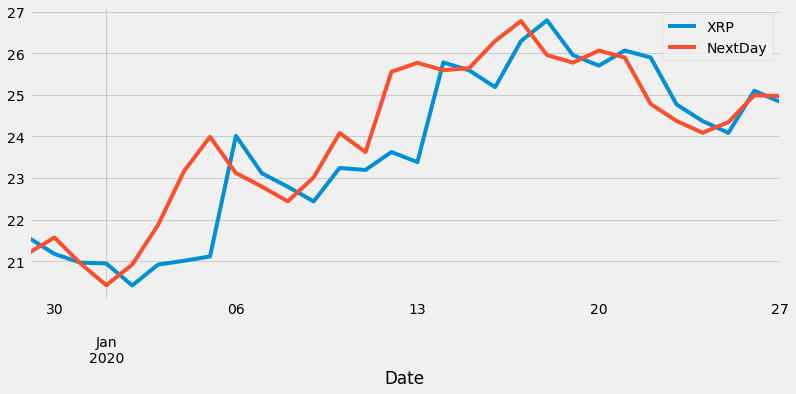

In [7]:
pre_list.iloc[-30:, :].plot(figsize=(12,5));

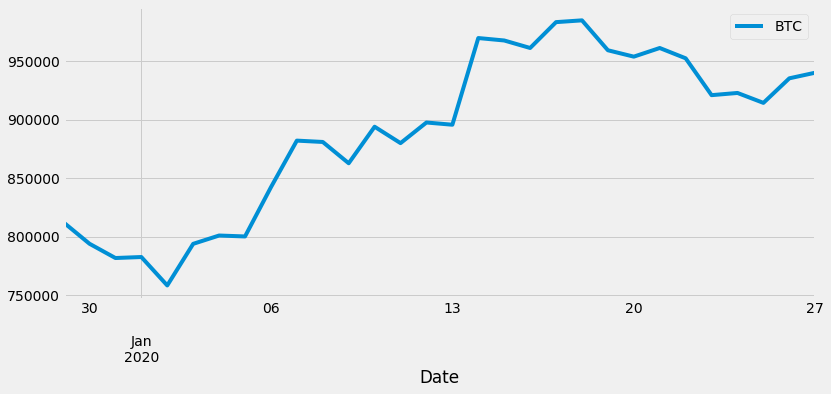

In [8]:
coin.iloc[-30:, :1].plot(figsize=(12,5));

In [9]:
y.tail()

,XRP
Date,
2020-01-21,26.067553
2020-01-22,25.900434
2020-01-23,24.771278
2020-01-24,24.372837
2020-01-25,24.087172


In [10]:
X.tail()

,BTC,XRP,ETH,LTC,XEM,LSK,count
Date,,,,,,,
2020-01-20,953901.7500,25.704670,18413.388672,6302.672852,4.129242,74.899231,1116
2020-01-21,961286.0625,26.067553,18651.896484,6336.242188,4.201872,78.817604,1117
2020-01-22,952480.9375,25.900434,18465.529297,6402.782715,4.737723,80.468956,1118
2020-01-23,920992.6875,24.771278,17849.964844,5985.127441,4.324434,83.475304,1119
2020-01-24,922874.7500,24.372837,17817.416016,5958.960449,4.316056,83.436279,1120


In [11]:
day3p = pre_list.iloc[-3:-2, 1:].values[0][0]
day2t = pre_list.iloc[-2:-1, :1].values[0][0]
if day3p > day2t:
    acc = day2t / day3p * 100
elif day3p < day2t:
    acc = day3p / day2t * 100
else:
    acc = 100

print(round(acc, 2))

96.99


In [12]:
total = 0
accl = []
for i in range(1, 30):
    e = (30 - i) * -1
    d = (29 - i) * -1
    if e != -1:
        p30 = pre_list.iloc[-30:, 1:].values[i - 1][0]
        t29 = pre_list.iloc[-29:, :1].values[i - 1][0]
    if p30 > t29:
        acc = (1 - t29 / p30) * 100
    elif p30 < t29:
        acc = (1 - p30 / t29) * 100
    else:
        acc = 100
    accl.append(acc)
    total += acc
    
gosa = total / 29
print(f'平均誤差:{round(gosa, 2)}%')
print(f'最大誤差:{round(max(accl),2)}%')
print(f'最小:{round(min(accl),2)}%')

平均誤差:11.63%
最大誤差:100%
最小:0.0%


In [13]:
coin.tail()

,BTC,XRP,ETH,LTC,XEM,LSK,count
Date,,,,,,,
2020-01-23,920992.6875,24.771278,17849.964844,5985.127441,4.324434,83.475304,1119
2020-01-24,922874.7500,24.372837,17817.416016,5958.960449,4.316056,83.436279,1120
2020-01-25,914396.5000,24.087172,17624.300781,5867.825195,4.213980,85.949577,1121
2020-01-26,935380.5000,25.099865,18287.677734,6116.240234,4.344247,85.939812,1122
2020-01-27,940191.7500,24.829632,18207.564453,6136.886230,4.267307,85.681534,1123
